# 8月全球科技热点统计报告
数据来源：全球技术地图

----

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio
from wordcloud import WordCloud
import jieba
import jieba.analyse
import sys

jieba.analyse.set_idf_path("./dicts/idf.txt")

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

d = pd.read_csv('./1808/8yue_all.csv',sep='|',header=0)

d.describe()

,title,content,field,source,date,content_clean
count,352,352,352,352,352,352
unique,352,352,9,134,32,352
top,NASA签发多项商业技术开发与市场研究合同,据纳米人8月28日消息，韩国汉阳大学通过控制电化学界面上的电位，抑制锂离子电池阳极上固体电解...,信息,EurekAlert网,8月13日,日本政府的一专家组近期得出结论称，不应对某些类型的基因编辑作物进行监管。监管遗传重组的法规适...
freq,1,1,70,29,21,1


In [85]:
'''
这块是用来提取国家的代码
'''
import jieba
from functools import reduce
from need_list import nation_list, us_kw, uk_kw, cn_kw, jp_kw, ru_kw, kr_kw, ge_kw


def fenci(wenben):
    '''
    采用全模式分词，粒度更细
    :wenben: 待分词的文本
    :returns: 分词列表
    '''
    seg_list = jieba.lcut_for_search(wenben)
    return seg_list


def get_nation_d(fenci_list):
    '''
    直接获取国家名称
    :fenci_list: list
    :nas: list
    '''
    head = fenci_list[:15]
    nas = []
    # print(head)
    for i in head:
        if i in nation_list and i not in nas:
            nas.append(i)
    return nas


def get_nation_ind(fenci_list):
    '''
    在没有直接出现国家名称时，用某些关键词来推断，并分类

    '''
    nas = []
    for i in fenci_list[:3]:
        if i == '美':
            nas.append('美国')
        if i == '中':
            nas.append('中国')
        if i == '英':
            nas.append('英国')
        if i == '法':
            nas.append('法国')
        if i == '俄':
            nas.append('俄罗斯')
        if i == '澳':
            nas.append('澳大利亚')
        if i == '德':
            nas.append('德国')
    if nas:
        return nas
    else:
        for i in fenci_list[:30]:
            if i in us_kw:
                nas.append('美国')
            if i in cn_kw:
                nas.append('中国')
            if i in ru_kw:
                nas.append('俄罗斯')
            if i in uk_kw:
                nas.append('英国')
            if i in jp_kw:
                nas.append('日本')
            if i in kr_kw:
                nas.append('韩国')
            if i in ge_kw:
                nas.append('德国')
        return nas

def manual(kw_list):
    print(kw_list[:30])
    nas = [input("请根据关键词输入国别: \n")]
    if nas:
        return nas


def foo(text):
    '''
    国家提取入口，先做分词，
    然后用关键词直接提取，
    不行就用规则，
    再不行就手动输入！
    '''
    res = fenci(text)
    zhijie = get_nation_d(res)
    if zhijie:
        pullout = zhijie
    else:
        jianjie = get_nation_ind(res)
        if jianjie:
            pullout = jianjie
        else:
            pullout = manual(res)
    # 对列表进行去重，用reduce函数，必须用"from functools import reduce"导入
    pullout = reduce(lambda x, y: x if y in x else x + [y], [[], ] + pullout)
    return pullout

In [86]:
area = list(map(foo, d['content_clean']))
area_str = []
for i in area:
    area_str.append(str(i).replace('[','').replace(']','').replace('\'',''))

['台积', '电', '公布', '病毒', '入侵', '事件', '详细', '进展', '，', '表示', '受', '电脑', '脑病', '病毒', '电脑病', '电脑病毒', '影响', '的', '机器', '已', '恢复', '80%', '，', '预计', '8', '月', '6', '日', '将', '完全']
请根据关键词输入国别: 
台湾
['埃森', '埃森哲', '发布', '2018', '年', '网络', '威胁', '概况', '报告', '，', '对', '2018', '年', '上半', '半年', '上半年', '网络', '安全', '网络安全', '风险', '进行', '了', '评估', '。', '报告', '指出', '5', '个', '值得', '重点']
请根据关键词输入国别: 
爱尔兰
['国家', '药品', '审评', '中心', '（', 'CDE', '）', '发布', '《', '关于', '征求', '境外', '已', '上市', '临床', '急需', '新药', '名单', '意见', '的', '通知', '》', '，', '列出', '了', 'AlectinibHydrochloride', '等', '48', '种', '已']
请根据关键词输入国别: 
中国
['网络', '安全', '网络安全', '公司', 'IOActive', '的', '研究', '人员', '警告', '称', '，', '飞机', '、', '舰船', '和', '军方', '使用', '的', '卫星', '通信', '卫星通信', '系统', '中均', '含有', '可能', '让', '黑客', '控制', '它们', '的']
请根据关键词输入国别: 
美国
['移动', '安全', '公司', 'Kryptowire', '的', '最新', '研究', '报告', '称', '，', '该', '公司', '在', '对', '多款', '安卓', '智能', '能手', '手机', '智能手机', '分析', '后', '发现', '，', '这些', '手机', '在', '出厂', '时', '就']
请根据关键词输入国别: 
美国
['区块', '链'

In [112]:
d['area'] = area_str

In [114]:
field_stat = pd.DataFrame(d['field'].value_counts())
field_stat

,field
信息,70
生物,63
能源,52
科技战略,39
新材料,30
航空,28
海洋,25
航天,24
先进制造,21


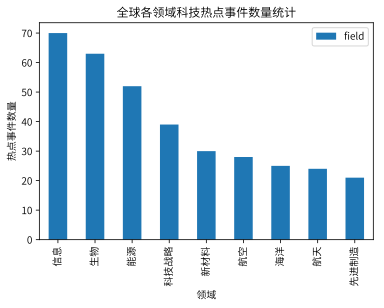

In [115]:
plt.rcParams['font.family'] = ['Source Han Sans CN']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

field_stat.plot(kind = 'bar', colormap='tab20')
plt.xlabel('领域')
plt.ylabel('热点事件数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

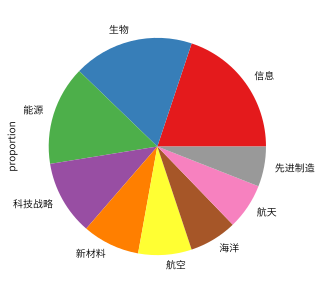

In [116]:
field_stat['proportion'] = field_stat['field'].map(lambda x: x/352)
field_stat
field_stat.plot(y='proportion',kind = 'pie',legend=False,figsize=(5,5),colormap='Set1')
# plt.xlabel('领域')
# plt.ylabel('热点事件数量')
# plt.title('全球各领域科技热点事件数量统计')
plt.show()

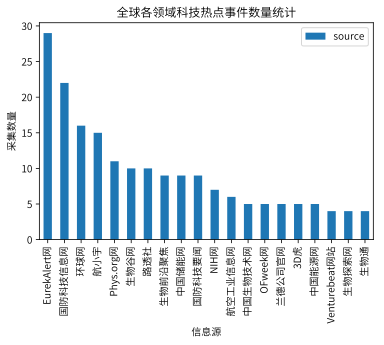

In [117]:
source_stat = pd.DataFrame(d['source'].value_counts())
source_stat[0:20].plot(kind = 'bar')
plt.xlabel('信息源')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

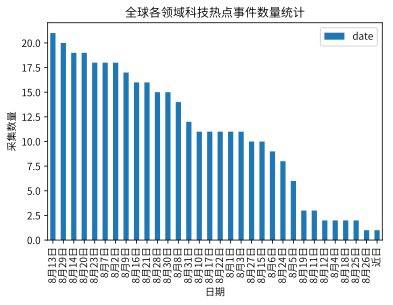

In [118]:
date_stat = pd.DataFrame(d['date'].value_counts())
date_stat.plot(kind = 'bar')
plt.xlabel('日期')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

## 1. 信息领域

-------

In [119]:
xx = d[d.field == '信息']
xx.head()

,title,content,field,source,date,content_clean,area
11,美国会通过法案，强制科技公司披露软件代码被外国政府审查情况,据路透社8月2日消息，美国国会通过一项法案，强制要求科技公司披露，是否允许中国和俄罗斯等国审...,信息,路透社,8月2日,美国国会通过一项法案，强制要求科技公司披露，是否允许中国和俄罗斯等国审查其销售给美国军方软件...,美国
12,埃隆马斯克表示特斯拉用于自动驾驶的AI芯片已基本研制完毕,据CNBC网站8月2日消息，特斯拉首席执行官埃隆马斯克表示，该公司用于处理自动驾驶的AI芯片...,信息,CNBC网站,8月2日,特斯拉首席执行官埃隆马斯克表示，该公司用于处理自动驾驶的AI芯片“Hardware3”已基本...,美国
22,德国英飞凌公司与阿里巴巴签署谅解备忘录，共同推动物联网发展,据路透社8月2日消息，德国英飞凌公司已与阿里巴巴的云计算部门签署谅解备忘录，双方将在物联网安...,信息,路透社,8月2日,德国英飞凌公司已与阿里巴巴的云计算部门签署谅解备忘录，双方将在物联网安全标准和电子商务渠道上...,德国
23,美国联邦通信委员会发布5G频谱竞标规则,据路透社8月3日消息，美国联邦通信委员会（FCC）发布5G无线网络高频频谱的竞标规则。据悉，...,信息,路透社,8月3日,美国联邦通信委员会（FCC）发布5G无线网络高频频谱的竞标规则。据悉，FCC将于11月14日...,美国
24,韩国计划对苹果和谷歌等跨国科技公司征税,据Engadget网站8月3日消息，韩国经济财政部和经济合作与发展组织共同成立了一个工作组，...,信息,Engadget网站,8月3日,韩国经济财政部和经济合作与发展组织共同成立了一个工作组，讨论对跨国科技公司的新税收政策。韩国...,韩国


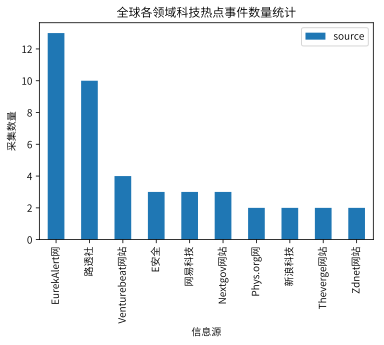

In [120]:
source_stat = pd.DataFrame(xx['source'].value_counts())
source_stat[0:10].plot(kind = 'bar')
plt.xlabel('信息源')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

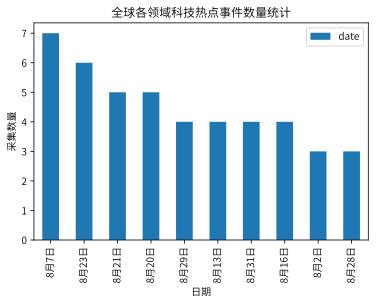

In [121]:
date_stat = pd.DataFrame(xx['date'].value_counts())
date_stat[:10].plot(kind = 'bar')
plt.xlabel('日期')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

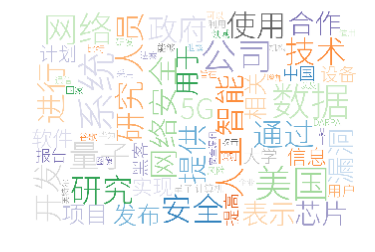

In [122]:
keywords_list = []
for i in xx['content_clean']:
#     tags = jieba.analyse.extract_tags(i, topK=10, withWeight=False, allowPOS=('n','nr','ns','nz','nt'))
    tags = jieba.cut(i, cut_all=False)
    for j in tags:
        keywords_list.append(j)
        
wclist = " ".join(keywords_list)
# print(wclist)
# def wordcount(wl):
#     # 文章字符串前期处理
#     count_dict = {}
#     # 如果字典里有该单词则加1，否则添加入字典
#     for str in wl:
#         if str in count_dict.keys():
#             count_dict[str] = count_dict[str] + 1
#         else:
#             count_dict[str] = 1
#     count_list=sorted(count_dict.items(),key=lambda x:x[1],reverse=True)
#     return count_list

# print(wordcount(keywords_list)[0:50])


# bg_pic = imageio.imread('./bg.jpeg')
wc = WordCloud(
    colormap='tab20c',
    background_color="white", #背景颜色
    font_path= "./font/syht.otf",  #字体用思源黑体
    max_words=100, #显示最大词数
    min_font_size=30,
    max_font_size=150, 
    width=1200,  #图幅宽度
    height=800   #词云高度
    )
wc.generate(wclist)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('./1.png')

## 2. 生物领域

------

In [123]:
sw = d[d.field == '生物']
sw.describe()

,title,content,field,source,date,content_clean,area
count,63,63,63,63,63,63,63
unique,63,63,1,28,26,63,21
top,欧盟委员会资助开发“AI+区块链”模式的体外诊断设备“CareAI”,据药明康德AI网8月14日消息，英国DeepMind公司与伦敦大学学院眼科学研究所合作开发出...,生物,生物谷网,8月14日,美国密歇根大学科学家通过对1782人的统计分析发现，与非肥胖成人相比，肥胖不仅会增加流感病毒...,美国
freq,1,1,63,10,5,1,39


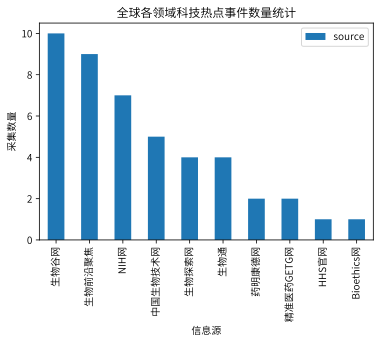

In [124]:
source_stat = pd.DataFrame(sw['source'].value_counts())
source_stat[0:10].plot(kind = 'bar')
plt.xlabel('信息源')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

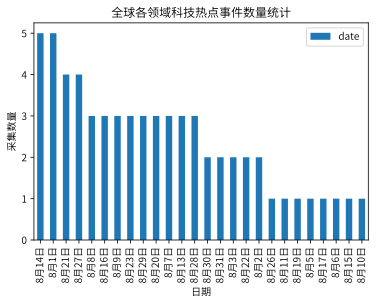

In [125]:
date_stat = pd.DataFrame(sw['date'].value_counts())
date_stat.plot(kind = 'bar')
plt.xlabel('日期')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

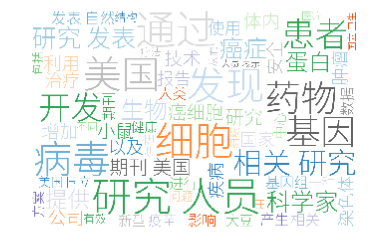

In [126]:
keywords_list = []
for i in sw['content_clean']:
#     tags = jieba.analyse.extract_tags(i, topK=10, withWeight=False, allowPOS=('n','nr','ns','nz','nt'))
    tags = jieba.cut(i, cut_all=False)
    for j in tags:
        keywords_list.append(j)
        
wclist = " ".join(keywords_list)
# print(wclist)
# def wordcount(wl):
#     # 文章字符串前期处理
#     count_dict = {}
#     # 如果字典里有该单词则加1，否则添加入字典
#     for str in wl:
#         if str in count_dict.keys():
#             count_dict[str] = count_dict[str] + 1
#         else:
#             count_dict[str] = 1
#     count_list=sorted(count_dict.items(),key=lambda x:x[1],reverse=True)
#     return count_list

# print(wordcount(keywords_list)[0:50])


# bg_pic = imageio.imread('./bg.jpeg')
wc = WordCloud(
    colormap='tab20c',
    background_color="white", #背景颜色
    font_path= "./font/syht.otf",  #字体用思源黑体
    max_words=100, #显示最大词数
    min_font_size=30,
    max_font_size=150, 
    width=1200,  #图幅宽度
    height=800   #词云高度
    )
wc.generate(wclist)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('./2.png')

## 3. 能源领域

-------

In [139]:
ny = d[d.field == '能源']
ny.head()

,title,content,field,source,date,content_clean,area
3,韩国将建世界最大燃料电池发电厂,据中国氢能源网8月1日消息，韩国西部电力公司、汉普公司、KB证券公司、忠清北道省政府和镇川郡...,能源,中国氢能源网,8月1日,韩国西部电力公司、汉普公司、KB证券公司、忠清北道省政府和镇川郡办事处签署建立绿色能源电厂联...,韩国
15,日本敲定减持钚新指针,据中国核电信息网8月2日消息，日本政府原子能委员会敲定削减日本钚持有量的新指针。该指针强调，...,能源,中国核电信息网,8月2日,日本政府原子能委员会敲定削减日本钚持有量的新指针。该指针强调，根据钚热发电的实施情况，国家仅...,日本
28,丰田发布第二代燃料电池Class8卡车,据环球网8月2日消息，丰田在北密歇根的行业盛会上发布第二代氢燃料电池Class8卡车。该车在...,能源,环球网,8月2日,丰田在北密歇根的行业盛会上发布第二代氢燃料电池Class8卡车。该车在丰田内部称为Beta，...,日本
29,特斯拉申请新电池管理专利,据OFweek锂电网8月3日消息，特斯拉申请新电池管理专利。电池芯在充电过程中以及释放能量时...,能源,OFweek网,8月3日,特斯拉申请新电池管理专利。电池芯在充电过程中以及释放能量时，都会产生热量。有缺陷的电池芯则会...,美国
30,BP向蔚来资本投资1000万美元,据中国储能网8月3日消息，BP风投（BPVentures）宣布对蔚来资本的美金基金投资100...,能源,中国储能网,8月3日,BP风投（BPVentures）宣布对蔚来资本的美金基金投资1000万美元。据悉，此项投资将...,英国


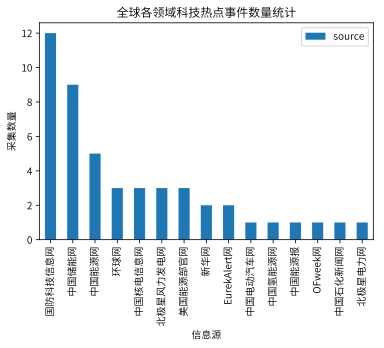

In [128]:
source_stat = pd.DataFrame(ny['source'].value_counts())
source_stat[0:15].plot(kind = 'bar')
plt.xlabel('信息源')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

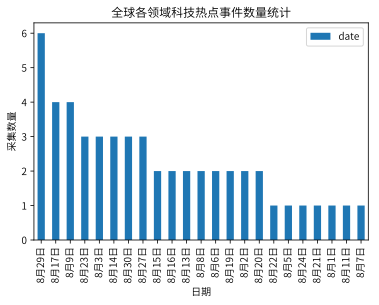

In [129]:
date_stat = pd.DataFrame(ny['date'].value_counts())
date_stat.plot(kind = 'bar')
plt.xlabel('日期')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

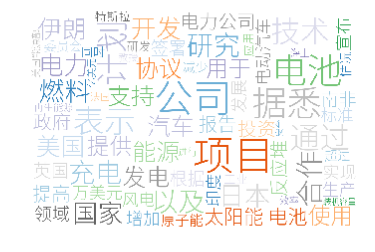

In [130]:
keywords_list = []
for i in ny['content_clean']:
#     tags = jieba.analyse.extract_tags(i, topK=10, withWeight=False, allowPOS=('n','nr','ns','nz','nt'))
    tags = jieba.cut(i, cut_all=False)
    for j in tags:
        keywords_list.append(j)
        
wclist = " ".join(keywords_list)

wc = WordCloud(
    colormap='tab20c',
    background_color="white", #背景颜色
    font_path= "./font/syht.otf",  #字体用思源黑体
    max_words=100, #显示最大词数
    min_font_size=30,
    max_font_size=150, 
    width=1200,  #图幅宽度
    height=800   #词云高度
    )
wc.generate(wclist)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('./3.png')

## 4. 科技战略

----------

In [131]:
kj = d[d.field == '科技战略']
kj.describe()

,title,content,field,source,date,content_clean,area
count,39,39,39,39,39,39,39
unique,39,39,1,22,22,39,10
top,美国国际战略研究中心发布《美国的反恐战略及反恐战争趋势》报告,据机工情报8月2日消息，美国商务部产业与安全局（BIS）于当地时间8月1日公布了新修订的出口...,科技战略,兰德公司官网,8月2日,兰德公司发布《中国“一带一路”倡议：改善交通运输连通性对该地区贸易影响评估》报告。报告指出，...,美国
freq,1,1,39,5,6,1,22


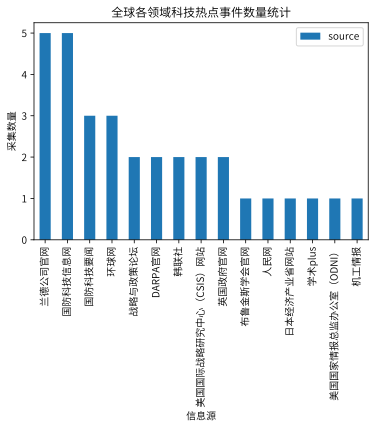

In [132]:
source_stat = pd.DataFrame(kj['source'].value_counts())
source_stat[0:15].plot(kind = 'bar')
plt.xlabel('信息源')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

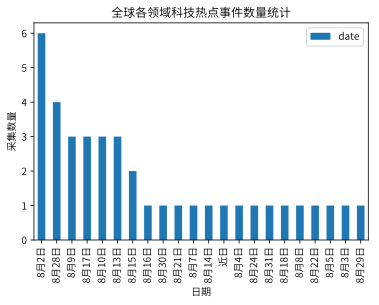

In [133]:
date_stat = pd.DataFrame(kj['date'].value_counts())
date_stat.plot(kind = 'bar')
plt.xlabel('日期')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

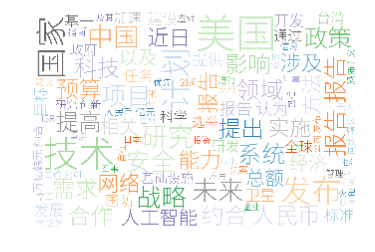

In [134]:
keywords_list = []
for i in kj['content_clean']:
#     tags = jieba.analyse.extract_tags(i, topK=10, withWeight=False, allowPOS=('n','nr','ns','nz','nt'))
    tags = jieba.cut(i, cut_all=False)
    for j in tags:
        keywords_list.append(j)
        
wclist = " ".join(keywords_list)

wc = WordCloud(
    colormap='tab20c',
    background_color="white", #背景颜色
    font_path= "./font/syht.otf",  #字体用思源黑体
    max_words=100, #显示最大词数
    min_font_size=30,
    max_font_size=150, 
    width=1200,  #图幅宽度
    height=800   #词云高度
    )
wc.generate(wclist)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('./4.png')

## 5. 新材料领域

------

In [169]:
cl = d[d.field == '新材料']
cl.describe()

,title,content,field,source,date,content_clean,area
count,30,30,30,30,30,30,30
unique,30,30,1,9,17,30,9
top,韩国高等科学技术研究院采用计算机模拟，确定了下一代碳纤维设计准则,据纳米人8月28日消息，韩国汉阳大学通过控制电化学界面上的电位，抑制锂离子电池阳极上固体电解...,新材料,EurekAlert网,8月28日,美国科罗拉多大学博尔德分校开发出高隔热性的透明气凝胶，可显著提升建筑物的能源效率，未来有望帮...,美国
freq,1,1,30,12,4,1,15


In [136]:
source_stat = pd.DataFrame(cl['source'].value_counts())
source_stat[0:15].plot(kind = 'bar')
plt.xlabel('信息源')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

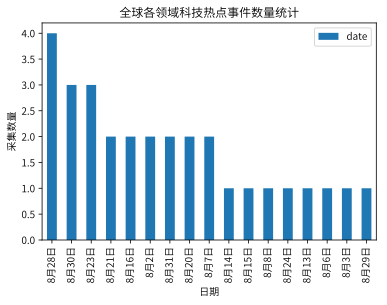

In [137]:
date_stat = pd.DataFrame(cl['date'].value_counts())
date_stat.plot(kind = 'bar')
plt.xlabel('日期')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

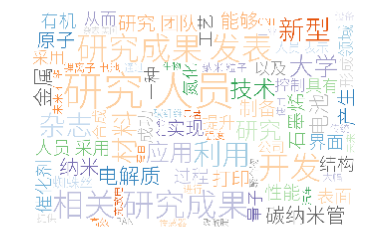

In [140]:
keywords_list = []
for i in cl['content_clean']:
#     tags = jieba.analyse.extract_tags(i, topK=10, withWeight=False, allowPOS=('n','nr','ns','nz','nt'))
    tags = jieba.cut(i, cut_all=False)
    for j in tags:
        keywords_list.append(j)
        
wclist = " ".join(keywords_list)

wc = WordCloud(
    colormap='tab20c',
    background_color="white", #背景颜色
    font_path= "./font/syht.otf",  #字体用思源黑体
    max_words=100, #显示最大词数
    min_font_size=30,
    max_font_size=150, 
    width=1200,  #图幅宽度
    height=800   #词云高度
    )
wc.generate(wclist)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('./4.png')

In [195]:
from need_list import us_pattern, cn_pattern, eu_pattern, uk_pattern, fr_pattern, ge_pattern, ca_pattern, au_pattern, jp_pattern, kr_pattern, ru_pattern, id_pattern, is_pattern, in_pattern
cl_ = cl[cl['area'].str.contains(us_pattern)]
cl_eu

,title,content,field,source,date,content_clean,area
308,Gartner发布《2018年新兴科技技术成熟度曲线报告》,据环球网8月30日消息，全球信息技术研究机构Gartner近日发布《2018年新兴科技技术成...,科技战略,环球网,8月30日,全球信息技术研究机构Gartner近日发布《2018年新兴科技技术成熟度曲线报告》，共包含3...,国际


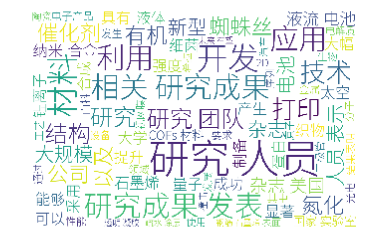

In [182]:
from imageio import imread  # 这是一个处理图像的函数
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

back_color = imread('mask.jpg')
keywords_list = []
for i in cl_us['content_clean']:
#     tags = jieba.analyse.extract_tags(i, topK=10, withWeight=False, allowPOS=('n','nr','ns','nz','nt'))
    tags = jieba.cut(i, cut_all=False)
    for j in tags:
        keywords_list.append(j)
        
wclist = " ".join(keywords_list)

wc = WordCloud(
    background_color="white", #背景颜色
    font_path= "./font/syht.otf",  #字体用思源黑体
    max_words=500, #显示最大词数
    min_font_size=30,
    max_font_size=150, 
    width=1200,  #图幅宽度
    height=800   #词云高度
    )
wc.generate(wclist)
image_colors = ImageColorGenerator(back_color)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('./cl_us.png')

In [183]:
len(cl['area'].str.contains(pattern))

30

In [205]:
import requests
import json

url = "https://api.crunchbase.com/v3.1/odm-organizations"

url1 = "https://api.crunchbase.com/v3.1/organizations/zapata-computing"

querystring = {
    "user_key": "b1cbb07d2570558989bfcd3ed428c247"
#     "query": "Zapata Computing"
}

r = requests.get(url1, params=querystring)
print(r.text)
# res_dict = json.loads(r.text)
# print(res_dict)

[{"status":409,"code":"LA409","message":"Request limit exceeded"}]
